# Week 4 - LINEAR REGRESSION - 31.01

## Project Challenges: 31.01




Project Challenges: Linear Regression

Create a notebook and perform the following tasks on this week’s bikes dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as sm
import scipy.stats as sps
from sklearn.cluster import KMeans

In [ ]:
#1.Load the data in a pandas dataframe

In [4]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       17379 non-null  int64  
 1   holiday      17379 non-null  int64  
 2   workingday   17379 non-null  int64  
 3   weather      17379 non-null  int64  
 4   temp         17379 non-null  float64
 5   atemp        17379 non-null  float64
 6   humidity     17379 non-null  int64  
 7   windspeed    17379 non-null  float64
 8   casual       10886 non-null  float64
 9   registered   10886 non-null  float64
 10  count        17379 non-null  int64  
 11  hour_of_day  17379 non-null  int64  
 12  month        17379 non-null  int64  
 13  year         17379 non-null  int64  
 14  part_of_day  17379 non-null  object 
dtypes: float64(5), int64(9), object(1)
memory usage: 2.1+ MB


In [5]:
#2.Set the datetime column as the dataframe index
bike_data = pd.read_csv('../data/bikes_clean.csv', parse_dates=True, index_col=0)
bike_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_of_day,month,year,part_of_day
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,0,1,2011,morning
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1,1,2011,morning
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2,1,2011,morning
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,3,1,2011,morning
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,4,1,2011,morning


In [6]:
#3.Subset the dataframe to extract the following columns: temp, atemp, humidity, windspeed and count
bike_data_season = bike_data[['temp', 'atemp', 'humidity', 'windspeed', 'count']]
bike_data_season.head()

,temp,atemp,humidity,windspeed,count
datetime,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0,16
2011-01-01 01:00:00,9.02,13.635,80,0.0,40
2011-01-01 02:00:00,9.02,13.635,80,0.0,32
2011-01-01 03:00:00,9.84,14.395,75,0.0,13
2011-01-01 04:00:00,9.84,14.395,75,0.0,1


In [8]:
#4.Generate a heatmap of the subset dataframe. Which of the features has the highest correlation with the count column ?
bike_data_season.corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.987672,-0.069881,-0.023125,0.414713
atemp,0.987672,1.000000,-0.051918,-0.062336,0.411854
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.329615
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.099909
count,0.414713,0.411854,-0.329615,0.099909,1.000000


<AxesSubplot: >

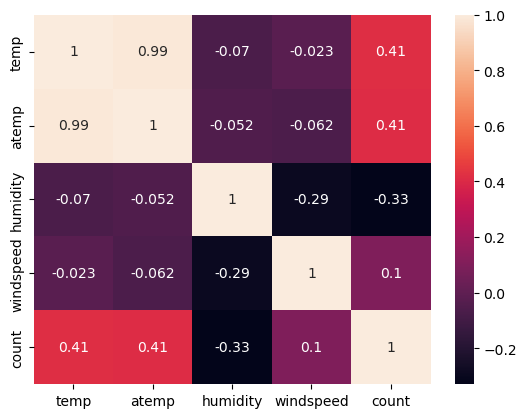

In [9]:
sns.heatmap(bike_data_season.corr(), annot=True)

In [14]:
#5.Using that feature from step. 4, build a simple linear regression model with count as the response variable. Calculate R2.
model0 = sm.ols(formula='count ~ temp', data=bike_data_season).fit()

In [15]:
model0.rsquared

0.171987164301862

In [20]:
#6.Add an additional feature from the subset dataframe and repeat step 5. Observe how the value R2 changed. How can this change be explained ?
model1 = sm.ols(formula='count ~ temp + atemp', data=bike_data_season).fit()

In [21]:
model1.rsquared

0.17219441705303484

In [23]:
#7.Add the remaining two features and repeat step 6. Does the model get better when atemp is added as a feature ? why ?
model2 = sm.ols(formula='count ~ temp + atemp + humidity + windspeed', data=bike_data_season).fit()

In [24]:
model2.rsquared

0.26626505184252514

In [325]:
#8.What additional features can be added to improve the fit of the model ?


In [326]:
#BONUS: Use features that were extracted and binned in the datetime lesson to improve the r² score even further.

In [327]:
df.reset_index().to_csv('bikes_okay.csv', index=False)